In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from hmmlearn import hmm

np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})


In [2]:
startprob = np.array([0.6, 0.3, 0.1])
transmat = np.array([[0.7, 0.2, 0.1], [0.3, 0.5, 0.2], [0.3, 0.3, 0.4]])
means = np.array([[0.0, 0.0], [3.0, -3.0], [5.0, 10.0]])
covars = np.tile(np.identity(2), (3, 1, 1))
model = hmm.GaussianHMM(3, "full", startprob, transmat)
model.means_ = means
model.covars_ = covars
# model.fit()
# X, Z = model.sample(100)

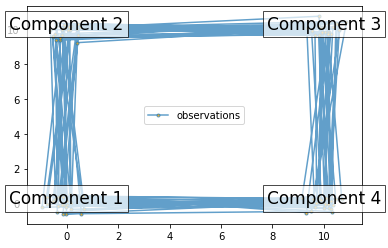

In [3]:

##############################################################
# Prepare parameters for a 4-components HMM
# Initial population probability
startprob = np.array([0.6, 0.3, 0.1, 0.0])
# The transition matrix, note that there are no transitions possible
# between component 1 and 3
transmat = np.array([[0, 1, 0.0, 0],
                     [0, 0, 1, 0.0],
                     [0.0, 0, 0, 1],
                     [1, 0, 0, 0]])
# The means of each component
means = np.array([[0.0,  0.0],
                  [0.0, 10.0],
                  [10.0, 10.0],
                  [10.0, 0.0]])
# The covariance of each component
# Sampling for the observing model
covars = .1 * np.tile(np.identity(2), (4, 1, 1))

# Build an HMM instance and set parameters
model = hmm.GaussianHMM(n_components=4, covariance_type="full")

# Instead of fitting it from the data, we directly set the estimated
# parameters, the means and covariance of the components
model.startprob_ = startprob
model.transmat_ = transmat
model.means_ = means
model.covars_ = covars
###############################################################

# Generate samples
X, Z = model.sample(100)

# Plot the sampled data
plt.plot(X[:, 0], X[:, 1], ".-", label="observations", ms=6,
         mfc="orange", alpha=0.7)

# Indicate the component numbers
for i, m in enumerate(means):
    plt.text(m[0], m[1], 'Component %i' % (i + 1),
             size=17, horizontalalignment='center',
             bbox=dict(alpha=.7, facecolor='w'))
plt.legend(loc='best')
plt.show()

# Now we make it a multinomial to reproduce results

In [4]:

##############################################################
# Prepare parameters for a 4-components HMM
# Initial population probability
startprob = np.array([1, 0, 0, 0])
# The transition matrix, note that there are no transitions possible
# between component 1 and 3
transmat = np.array([[0, 0, 0, 1],
                     [1, 0, 0, 0],
                     [0, 1, 0, 0],
                     [0, 0, 1, 0]])
# The means of each component
means = np.array([[0.0,  0.0],
                  [0.0, 10.0],
                  [10.0, 10.0],
                  [10.0, 0.0]])
# The covariance of each component
# Sampling for the observing model
# covars = .1 * np.tile(np.identity(2), (4, 1, 1))

#Probability of emitting value from a given state
# n_components,n_features
r_corr = .8
emissionprob = np.array([[r_corr, 1 - r_corr, 0, 0],
                        [0, r_corr, 1 - r_corr, 0],
                        [0, 0, r_corr, 1 - r_corr],
                        [1 - r_corr, 0, 0, r_corr]])

# Build an HMM instance and set parameters
model_d = hmm.MultinomialHMM(n_components=4)

# Instead of fitting it from the data, we directly set the estimated
# parameters, the means and covariance of the components
model_d.startprob_ = startprob
model_d.transmat_ = transmat
model_d.means_ = means
model_d.emissionprob_ = emissionprob
###############################################################

# Generate samples
X, Z = model_d.sample(100000)

# Plot the sampled data
# plt.plot(np.arange(X.shape[0]),X[:, :], ".-", label="observations", ms=6,
#          mfc="orange", alpha=0.7)

# Indicate the component numbers
# for i, m in enumerate(means):
#     plt.text(m[0], m[1], 'Component %i' % (i + 1),
#              size=17, horizontalalignment='center',
#              bbox=dict(alpha=.7, facecolor='w'))
# plt.legend(loc='best')
# plt.show()

In [5]:
# print(X)
# for i in range(X.shape[0]):
#     print('Observation',X[i,0], 'State',Z[i])
    
print(X[:,0].shape)
print(Z.shape)
q = np.vstack([X[:,0],Z])
model_d_est = hmm.MultinomialHMM(n_components=4)
model_d_est.fit(q)


(100000,)
(100000,)


MultinomialHMM(algorithm='viterbi', init_params='ste', n_components=4,
               n_iter=10, params='ste',
               random_state=<mtrand.RandomState object at 0x1192cd288>,
               startprob_prior=1.0, tol=0.01, transmat_prior=1.0,
               verbose=False)

In [6]:
model_d_est
# print(X)

st = 0

print(model_d_est.predict([[st]]))

#Predict posterior probability for each state, should be trans mat of 1
print(model_d_est.predict_proba([[st]]))

model_d_est.sample()

model_d_est

[2]
[[0.000 0.000 1.000 0.000]]


MultinomialHMM(algorithm='viterbi', init_params='ste', n_components=4,
               n_iter=10, params='ste',
               random_state=<mtrand.RandomState object at 0x1192cd288>,
               startprob_prior=1.0, tol=0.01, transmat_prior=1.0,
               verbose=False)

Information Flow from E to Y defined as:

\begin{align}
J_t(E\rightarrow Y) :&= I(Y_{t+1};E_t|Y_t) \\
& = I(Y_{t+1};E_t) - (I(Y_{t+1};Y_t) - I(Y_{t+1};Y_t|E_t)) 
\end{align}

If the agent is independent of the environment then there is no information flow between the two. Thus there is by definition information closure. However this is trivial information closure

Non-trivial information closure involves an agent encoding information about the environment dynamics. This means the mutual information 

$$ I(Y_{t+1};E_t) > 0$$
thus 
$$H(Y_{t+1}) - H(Y_{t+1}|E_t) > 0 $$
Implying:
$$ I(Y_{t+1};Yt) - 0$$

In [7]:
#Example
#H(.5,.5) should be 1 bit
p = np.array([.2,.2])
def calc_entropy(p):
    """Calculate entropy of a 1d np array
    
    H(X) = sum over p(X) of -p(x)*log(p(x))
    """
    tot = np.sum(p)
    X = p*1/tot
    ent_parts = -X*np.log2(X)
    return np.nansum(ent_parts)

#Vectorize
v_calc_entropy = np.vectorize(calc_entropy,otypes=[np.float])

print('H(.5,.5) =',calc_entropy(p),'bits')


#Example
p_rel = np.array([[1/8,1/16,1/32,1/32],
                  [1/16,1/8,1/32,1/32],
                  [1/16,1/16,1/16,1/16],
                  [1/4,0,0,0]])

#print(v_calc_entropy(p_rel))
def rel_entropy(pxpy):
    """Calculate relative entropy of 
    
    Sum of entropy of X given Y
    
    H(X|Y) = sum over y in Y, x in X of -p(y)*p(x|y)log(p(x|y))
    """
    
    #ent_parts = -p*np.log2(p)
    tot = np.sum(pxpy)
    pxpy_norm= pxpy*1/tot
    
    hxgy = np.zeros(pxpy.shape[0],)
    
    #probability of x given y should be the row,assuming y is the columns
    for i,pxgy in enumerate(pxpy_norm):
        hxgy[i] = calc_entropy(pxgy)
    
    #weights of the sum, or the probability of each component in y
    py = np.sum(pxpy_norm,axis=1)
    print('py:',py)
    return np.dot(py,hxgy)


    
print('H(X|Y) =', rel_entropy(p_rel), 'bits')

H(.5,.5) = 1.0 bits
py: [0.250 0.250 0.250 0.250]
H(X|Y) = 1.375 bits


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log2
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in multiply
  # This is added back by InteractiveShellApp.init_path()


# Now that we have entropy and conditional entropy, we need KL divergence

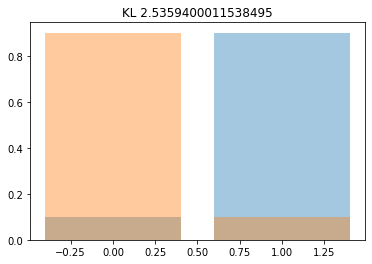

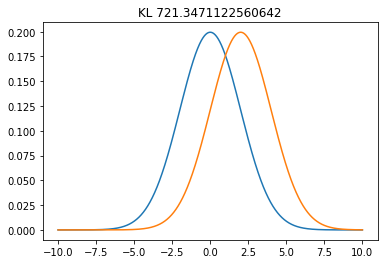

721.3471122560642


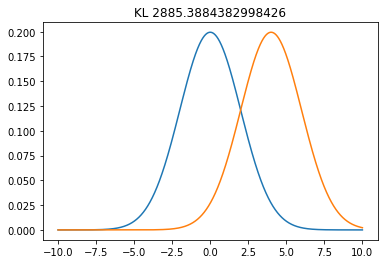

2885.3884382998426
Looks about right


In [8]:
from scipy.stats import norm

def kl(p,q):
    '''Calculate KL divergence of q from p
    D(X||Y) = sum over events i of p(i)*log(p(i)/q(i))
    '''
    
    d = np.zeros(p.shape)
    
    
    d = p*np.log2(p/q)
    
    return np.sum(d)
x = np.array([0,1])
p = np.array([.1,.9])
q = np.array([.9,.1])
plt.bar(x,p,alpha=.4)
plt.bar(x,q,alpha=.4)
plt.title('KL ' + str(kl(p,q)))
plt.show()

x = np.arange(-10, 10, 0.001)
p = norm.pdf(x, 0, 2)
q = norm.pdf(x, 2, 2)
plt.plot(x,p)
plt.plot(x,q)
plt.title('KL '+ str(kl(p,q)))
plt.show()
print(kl(p,q))
p = norm.pdf(x, 0, 2)
q = norm.pdf(x, 4, 2)
plt.plot(x,p)
plt.plot(x,q)
plt.title('KL '+ str(kl(p,q)))
plt.show()
print(kl(p,q))
print('Looks about right')

# Mutual information time
We will know the true distribution of the environment $E$, however we will have a predicted distribution of the environment $\hat{E}$ through the prediction system which should be a part of the agent




The environment $E$ will be drawn from the probability distribution that we will have access to, or can be calculated from the data through (monte carlo) methods, starting at random state and seeing where it will go next (to ensure starting from each state evenly).

The agents prediction of the environment next state should be sampled from the agents distribution. The output of the agent will be based on both the preceding environment and the preceding agent state. 

Ideally, the agent will perfectly model the environment when the agent doesn't have direct access to the environment state.

Given what the agent takes in, we should be able to get the the distribution based on either feeding appropriate values into the estimation function. From this we can apporximate the normal entropy, the conditional entropy given the previous environment state, and the conditional entropy given the previous agent state

In [9]:
def mut_info(x,y):
    pass

In [10]:
def run_trials(X,num=20,num_comp=4):
    best_mod = None
    sc = 0
    best = -np.inf
    for i in range(num):
        mod = hmm.MultinomialHMM(n_components=num_comp)
        mod.fit(X)
        sc = mod.score(X)
        print('Score of {}:'.format(i),sc)
        if sc > best:
            print('New best', best)
            best = sc
            best_model = mod
        
    return best_model
    
    
best_mod = run_trials(X,10)

Score of 0: -130549.25773993348
New best -inf
Score of 1: -64326.500521093265
New best -130549.25773993348
Score of 2: -98104.30930830819
Score of 3: -95612.17842110973
Score of 4: -60607.61819704873
New best -64326.500521093265
Score of 5: -66931.10657364866
Score of 6: -128569.71396775372
Score of 7: -50059.6201700833
New best -60607.61819704873
Score of 8: -75203.86638085837
Score of 9: -126568.0878177092


In [11]:
model_d_est
# print(X)

st = 0

print(model_d_est.predict([[st]]))

#Predict posterior probability for each state, should be trans mat of 1
print(model_d_est.predict_proba([[st]]))

model_d_est.sample()

#What the model contains
print(model_d_est.__dict__.keys())

print(model_d_est.transmat_)

z_est = model_d_est.transmat_
z = model_d.transmat_
q = model_d.emissionprob_
q_est = model_d_est.emissionprob_
print('Real:',q)
print('Est:',q_est)
print('Real',rel_entropy(q),'Est',rel_entropy(q_est))

calc_entropy(np.array([.8,.2]))
# obs_prob = np.array([[]])

print(model_d.get_stationary_distribution())

[2]
[[0.000 0.000 1.000 0.000]]
dict_keys(['n_components', 'params', 'init_params', 'startprob_prior', 'transmat_prior', 'algorithm', 'random_state', 'n_iter', 'tol', 'verbose', 'monitor_', 'startprob_', 'transmat_', 'n_features', 'emissionprob_'])
[[0.029 0.044 0.924 0.002]
 [0.012 0.028 0.005 0.955]
 [0.008 0.949 0.018 0.026]
 [0.866 0.001 0.065 0.068]]
Real: [[0.800 0.200 0.000 0.000]
 [0.000 0.800 0.200 0.000]
 [0.000 0.000 0.800 0.200]
 [0.200 0.000 0.000 0.800]]
Est: [[0.027 0.945 0.028 0.001]
 [0.049 0.001 0.012 0.939]
 [0.945 0.044 0.006 0.005]
 [0.000 0.044 0.905 0.051]]
py: [0.250 0.250 0.250 0.250]
py: [0.250 0.250 0.250 0.250]
Real 0.7219280948873623 Est 0.4169087075604494
[0.250 0.250 0.250 0.250]


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log2
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in multiply
  # This is added back by InteractiveShellApp.init_path()


In [12]:
a = .8
b = 1 - a
testq =  np.array([[a*b, a*a + b*b, a*b, 0],
                        [0,a*b, a*a + b*b, a*b],
                        [a*b,0, a*b, a*a + b*b],
                        [a*a + b*b,a*b, 0, a*b]])
print(testq)


print('sum',np.sum(testq))
print(rel_entropy(testq))
print(calc_entropy(testq[0]))
print(np.sum(q,axis=0),q)

[[0.160 0.680 0.160 0.000]
 [0.000 0.160 0.680 0.160]
 [0.160 0.000 0.160 0.680]
 [0.680 0.160 0.000 0.160]]
sum 4.0
py: [0.250 0.250 0.250 0.250]
1.2243814577244936
1.2243814577244936
[1.000 1.000 1.000 1.000] [[0.800 0.200 0.000 0.000]
 [0.000 0.800 0.200 0.000]
 [0.000 0.000 0.800 0.200]
 [0.200 0.000 0.000 0.800]]


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log2
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in multiply
  # This is added back by InteractiveShellApp.init_path()


In [13]:
print(q.T)

[[0.800 0.000 0.000 0.200]
 [0.200 0.800 0.000 0.000]
 [0.000 0.200 0.800 0.000]
 [0.000 0.000 0.200 0.800]]


In [14]:
z = np.roll(np.eye((4)),1,axis=1)
def obs_given_obs(E,T):
    """Takes in emission mat and transition probability mat
    returns next observation prob given prev observation prob and transition prob
    """
    return np.dot(E.T,np.dot(T,E))

print('HERE',obs_given_obs(q,z))

print('out')
print(testq)

print('H(et+1|e+t) = ',rel_entropy(obs_given_obs(q_est,z_est)))
print('q',q)
print('q_est',q_est)

HERE [[0.160 0.680 0.160 0.000]
 [0.000 0.160 0.680 0.160]
 [0.160 0.000 0.160 0.680]
 [0.680 0.160 0.000 0.160]]
out
[[0.160 0.680 0.160 0.000]
 [0.000 0.160 0.680 0.160]
 [0.160 0.000 0.160 0.680]
 [0.680 0.160 0.000 0.160]]
py: [0.255 0.258 0.238 0.249]
H(et+1|e+t) =  0.9405419457412441
q [[0.800 0.200 0.000 0.000]
 [0.000 0.800 0.200 0.000]
 [0.000 0.000 0.800 0.200]
 [0.200 0.000 0.000 0.800]]
q_est [[0.027 0.945 0.028 0.001]
 [0.049 0.001 0.012 0.939]
 [0.945 0.044 0.006 0.005]
 [0.000 0.044 0.905 0.051]]


# Here will be the attempt to calculate NTIC

$ NTIC = I(Y_{t+1};E_t) - I(Y_{t+1};E_t|Y_t) $

$I(Y_{t+1};E_t) = H(Y_{t+1}) - H(Y_{t+1}|E_t)$

$I(Y_{t+1};E_t|Y_t) = H(Y_{t+1}|Y_t) - H(Y_{t+1}|E_t,Y_t)$

$NTIC = H(Y_{t+1}) - H(Y_{t+1}|E_t) - (H(Y_{t+1}|Y_t) - H(Y_{t+1}|E_t,Y_t))$

In [15]:
#This is the cell of all cells that will calculate NTIC

def ntic(pxpypz):
    '''Compute the non-trivial information closure defined above
    assuming
    px=p(y_t+1)
    py = p(y_t)
    pz = p(e_t)    
    '''
    hy1 = calc_entropy(np.sum(pxpypz,axis=(1,2)))
    
    
    
    pxpzpy = np.moveaxis(pxpypz,1,2)
    hy1ge = condit_entropy_2(pxpzpy)
    hy1gy = condit_entropy_2(pxpypz)
    hy1gey = condit_entropy_2g1(pxpypz)
    
    print('H(Y_t+1)',hy1)
    print('H(Y_t+1|e_t',hy1ge)
    print('H(Y_t+1|Y_t)',hy1gy)
    print('H(Y_t+1|E_t,Y_t)',hy1gey)
    
    ntic = (hy1 - hy1ge -(hy1gy-hy1gey))
    info_flow = hy1gy - hy1gey
    return ntic,info_flow

ntic(w)

NameError: name 'w' is not defined

# Layout

The environment is modelled as a hidden markov model which starts with the state $E_t$. Where the next state $E_{t+1}$ is a distribution determined from the transfer matrix $T$ via:

$$E_{t+1} = E_tT$$

Since this state isn't observable, the 'hidden' state emits observations through the emission matrix $Z$. Thus:

$$e_{t+1} = E_tTZ$$

and finally the joint distribution is 

$$e_{t+1} = e_tZ^TTZ$$

$e_t$ is the environmental observation at time t

$e_{t+1}$ is the enviso



# Modelling the environment

We assume that there system $Y$ which attempts to model the environment through only the perceived observations. Thus, the system tries to fit the function:

$$f(e_t) = \hat{e}_{t+1}$$

While this seems to be a function of strictly the previous 


# Showing as it is control theory

$$\dot{X_t} = AX + BU$$


# Get 3 variable joint distr

In [ ]:
##############################################################
# Prepare parameters for a 4-components HMM
# Initial population probability
startprob = np.array([1, 0, 0, 0])
# The transition matrix, note that there are no transitions possible
# between component 1 and 3
transmat = np.array([[.5, 0, 0, .5],
                     [.5, .5, 0, 0],
                     [0, .5, .5, 0],
                     [0, 0, .5, .5]])
# The means of each component
means = np.array([[0.0,  0.0],
                  [0.0, 10.0],
                  [10.0, 10.0],
                  [10.0, 0.0]])
# The covariance of each component
# Sampling for the observing model
# covars = .1 * np.tile(np.identity(2), (4, 1, 1))

#Probability of emitting value from a given state
# n_components,n_features
r_corr = 1
emissionprob = np.array([[r_corr, 1 - r_corr, 0, 0],
                        [0, r_corr, 1 - r_corr, 0],
                        [0, 0, r_corr, 1 - r_corr],
                        [1 - r_corr, 0, 0, r_corr]])

# Build an HMM instance and set parameters
model_d2 = hmm.MultinomialHMM(n_components=4)

# Instead of fitting it from the data, we directly set the estimated
# parameters, the means and covariance of the components
model_d2.startprob_ = startprob
model_d2.transmat_ = transmat
model_d2.means_ = means
model_d2.emissionprob_ = emissionprob
###############################################################

# Generate samples
X, Z = model_d2.sample(10000)

In [ ]:
#Estimate it
q = np.vstack([X[:,0],Z])
model_d2_est = hmm.MultinomialHMM(n_components=8)
# model_d2_est.fit(q)

In [ ]:
for i in range(10000):
    #Get prediction

In [ ]:
help(model_d_est)

In [ ]:

# print(X)

st = 0

print(model_d_est.predict([[st]]))

#Predict posterior probability for each state, should be trans mat of 1
print(model_d_est.predict_proba([[st]]))

model_d_est.sample()

print('transmat',model_d_est.transmat_)

print('Testing here:')
#We assume the estimated model is our "Agent"
for i in range(X.shape[0]):
    #current observation given the previous observation
    obsv_g_env = model_d_est.predict([[Z[i-1,0]]])
    
    obsv_g_env_ag
    print('step {}: \tstate - {}\tobsv - {} '.format(i,X[i,0],Z[i]))
    
    if i > 100:
        break
# print(q[:20])

# Notes

Information is non-trivial if the system state can predict the environment, sharing mutual information:
$$I(Y_{t+t};E_t) >0$$



# Pytorch LSTM


In [16]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
# torch.set_default_tensor_type('torch.LongTensor')

In [17]:
print(q[0,:-1].shape)

(3,)


In [18]:
#Here we actuall do it right
num_epochs = 1000
def one_hot(a):
    '''takes in 1d np, gives out one hot
    [0] = [1 0 0 0]
    [3] = [0 0 0 1]'''
    b = np.zeros((a.size, a.max()+1))
    b[np.arange(a.size),a] = 1
    return b

#Assuming we have X_t, predict X_t+1
x_train = q[0,:-1]
y_train = q[0,1:]

x_train = one_hot(x_train)
# y_train = one_hot(y_train)

x_train = np.expand_dims(x_train,1)
y_train = np.expand_dims(y_train,1)


x_train = torch.from_numpy(x_train).float()
y_train = torch.from_numpy(y_train).long()

#We need samples, batch, in_shape
print("X",x_train.shape, x_train.type())
print("Y",y_train.shape, y_train.type())

#Stuff
mod = nn.LSTM(4,4)
mod2 = nn.Linear(4,4)
sig = nn.Sigmoid()
loss_fn = nn.CrossEntropyLoss()
opt = torch.optim.Adam(mod.parameters(),lr=.01)


#Train
print('Training')
for t in range(num_epochs):
    mod.zero_grad()
    
#     tlstm.hidden = tlstm.init_hidden()
    
    #Forward
    y_pred, misc  = mod(x_train)
    y_pred = sig(y_pred)
#     y_pred = mod2(y_pred)
#     print('y_train',y_train[:,0].shape,y_train.type())
#     print('y_pred',y_pred[:,0,:].shape,y_pred.type())
    loss= loss_fn(y_pred[:,0,:],y_train[:,0])
    
    opt.zero_grad()
    
    loss.backward()
    
    opt.step()
    
    if t%5 == 0:
        print("Epoch ", t, "Cross Entropy:",loss.item())


# tout = np.sin(tinp)
# tout = np.expand_dims(tout,-1)
# tout = np.expand_dims(tout,-1)
# # tout = np.expand_dims(tout,-1)
# tout = torch.from_numpy(tout).float()

# # loss = nn.CrossEntropyLoss()
# loss_fn = nn.MSELoss()
# o

# print(opt)
# print(tin.shape,tout.shape)
# print(tin.type(),tout.type())

# for t in range(num_epochs):
#     tlstm.zero_grad()
    
# #     tlstm.hidden = tlstm.init_hidden()
    
#     #Forward
#     y_pred, _ = tlstm(tin)
#     loss = loss_fn(y_pred,tout)
    
#     opt.zero_grad()
    
#     loss.backward()
    
#     opt.step()
    
#     if t%100 == 0:
#         print("Epoch ", t, "MSE:",loss.item())

# out = loss(tin,tout)
# print(out)
# out.backward()

#out,hidden = tlstm(tin)
# print(tout)

TypeError: 'numpy.float64' object cannot be interpreted as an integer

In [19]:
# for i in range(10):
#     print(x_train[i],y_pred[i])
    
st = q[0,:-1]

print('lol',np.array(y_pred.data[:,0,:]).shape)

state = None
for i in range(st.shape[0]):
    y_pred, state  = mod(x_train[i].unsqueeze(0),state)
    y_pred = sig(y_pred)
    print(y_pred.data[:,0,:])
    yt1 = np.argmax(y_pred.data[:,0,:])
    
#     if i > 0:
#         y_pred, misc  = mod(x_train)
#         y_pred = sig(y_pred)
        
#         yt1 = np.argmax(np.array(y_pred.data[:,0,:]))
#         continue
        
    
    print('e^',st[i],'yt+1',yt1)

NameError: name 'y_pred' is not defined

In [ ]:
criterion = nn.CrossEntropyLoss()

output = torch.autograd.Variable(torch.randn(10, 120).float())
target = torch.autograd.Variable(torch.FloatTensor(10).uniform_(0, 120).long())

print(output.shape,target.shape)
loss = criterion(output, target)

In [ ]:
input = torch.randn(3, 5, requires_grad=True)
target = torch.empty(3, dtype=torch.long).random_(5)
output = loss_fn(input, target)
print(input.type())
print(target.type())
print(output)

In [ ]:
components = 1
lstm = nn.LSTM(components,4)
criterion = nn.CrossEntropyLoss()

# initialize the hidden state.
hidden = (torch.randn(1,1, 4).long())

# inputs = [torch.randn(1, 3) for _ in range(5)]

In [ ]:
in1 = np.expand_dims(q[0,:-1],-1)
in1 = np.expand_dims(in1,-1)
in1 = torch.from_numpy(in1).long()
out1 = np.expand_dims(q[0,1:],-1)
out1 = np.expand_dims(out1,-1)
out1 = torch.from_numpy(out1).long()
print(in1.shape,out1.shape)

print(in1.type(),out1.type())

In [ ]:
class LSTM_pred(nn.Module):

    def __init__(self, embedding_dim, hidden_dim, vocab_size, tagset_size):
        super(LSTM_pred, self).__init__()
        self.hidden_dim = hidden_dim

        self.word_embeddings = nn.Embedding(vocab_size, embedding_dim)

        # The LSTM takes word embeddings as inputs, and outputs hidden states
        # with dimensionality hidden_dim.
        self.lstm = nn.LSTM(embedding_dim, hidden_dim)

        # The linear layer that maps from hidden state space to tag space
        self.hidden2tag = nn.Linear(hidden_dim, tagset_size)

    def forward(self, sentence):
        embeds = self.word_embeddings(sentence)
        lstm_out, _ = self.lstm(embeds.view(len(sentence), 1, -1))
        tag_space = self.hidden2tag(lstm_out.view(len(sentence), -1))
        tag_scores = F.log_softmax(tag_space, dim=1)
        return tag_scores

In [21]:
num_epochs = 1000






tlstm = nn.LSTM(4,4)
tinp = np.arange(0,1000)
tin = np.expand_dims(tinp,-1)
tin = np.expand_dims(tin,-1)
tin = torch.from_numpy(tin).float()

tout = np.where(tinp>300,tinp,0)
tout = np.expand_dims(tout,-1)
tout = np.expand_dims(tout,-1)
# tout = np.expand_dims(tout,-1)
tout = torch.from_numpy(tout).float()

loss_fn = nn.CrossEntropyLoss()
# loss_fn = nn.MSELoss()
opt = torch.optim.Adam(tlstm.parameters())

print(opt)
print(tin.shape,tout.shape)
print(tin.type(),tout.type())

for t in range(num_epochs):
    tlstm.zero_grad()
    
#     tlstm.hidden = tlstm.init_hidden()
    
    #Forward
    y_pred, _ = tlstm(tin)
    loss = loss_fn(y_pred,tout)
    
    opt.zero_grad()
    
    loss.backward()
    
    opt.step()
    
    if t%100 == 0:
        print("Epoch ", t, "MSE:",loss.item())

# out = loss(tin,tout)
# print(out)
# out.backward()

#out,hidden = tlstm(tin)
# print(tout)

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
)
torch.Size([1000, 1, 1]) torch.Size([1000, 1, 1])
torch.FloatTensor torch.FloatTensor


RuntimeError: input.size(-1) must be equal to input_size. Expected 4, got 1

In [ ]:
out,hidden = lstm(in1)
loss = criterion(output, target)
loss.backward()

#

In [ ]:
help(hmm.MultinomialHMM)

# Desire: Make agent that tries to guess X+1 here from just X, without knowing Z
Z being the current actual state



In [ ]:
.8**2 + .2**2 + .8*.2*2

In [ ]:
# !pip install torch torchvision

import pytorch